In [246]:
#import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from keras.datasets import mnist

In [247]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Load the data

device = "cuda" if torch.cuda.is_available() else "cpu" # Set the device

# ----- Shuffle the data ----- #

shuffled_train_indices = np.random.permutation(len(train_images))
shuffled_test_indices = np.random.permutation(len(test_images))

train_images, train_labels = train_images[shuffled_train_indices], train_labels[shuffled_train_indices]
test_images, test_labels = test_images[shuffled_test_indices], test_labels[shuffled_test_indices]

# ----- Normalize the data ----- #

train_images = train_images / 255.0
test_images = test_images / 255.0

# ----- One-hot encode the labels ----- #

test_labels_non_one_hot = test_labels
train_labels_non_one_hot = train_labels

train_labels = F.one_hot(torch.tensor(train_labels).long(), num_classes=10).float()
test_labels = F.one_hot(torch.tensor(test_labels).long(), num_classes=10).float()

# ----- Reshape the data ----- #

train_images = torch.tensor(train_images.reshape(-1, 28*28)).float()
test_images = torch.tensor(test_images.reshape(-1, 28*28)).float()

In [248]:
# ----- Hyperparameters ----- #

input_size = 784
hidden_size = 128
num_classes = 10
epochs = 5
layer_count = 4

In [249]:
data_loader = torch.utils.data.DataLoader(dataset=list(zip(train_images, train_labels)), batch_size=64, shuffle=True)

In [273]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(nn.Linear(784, 784), nn.ReLU(), nn.BatchNorm1d(784), nn.Linear(784, 10))
        
    def forward(self, inputs):
        return self.model(inputs)
    
    def classify(self, inputs):
        return torch.argmax(self.forward(inputs), dim=1)

In [275]:
model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [288]:
for epoch in range(epochs):
    model.train()
    for input_batch, label_batch in data_loader:
        label_prediction = model(input_batch)
        loss = F.cross_entropy(label_prediction, label_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    model.eval()
    with torch.no_grad():
        label_prediction = model(test_images)
        accuracy = (F.one_hot(torch.argmax(label_prediction, dim=1), num_classes=10) == test_labels).float().mean()
        print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.5f} | Accuracy: {accuracy:.5f}")

Epoch 1/5 | Loss: 0.01174 | Accuracy: 0.99564
Epoch 2/5 | Loss: 0.00234 | Accuracy: 0.99620
Epoch 3/5 | Loss: 0.20425 | Accuracy: 0.99602
Epoch 4/5 | Loss: 0.24443 | Accuracy: 0.99604
Epoch 5/5 | Loss: 0.04665 | Accuracy: 0.99574


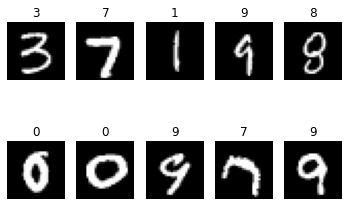

In [280]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
    plt.title(test_labels_non_one_hot[i])
    plt.axis("off")

In [287]:
print("Predicted: ", model.classify(test_images[:10].reshape(-1, 784)).tolist())
print("Expected:  ", test_labels_non_one_hot[:10].tolist())

Predicted:  [3, 7, 1, 9, 8, 0, 0, 9, 7, 9]
Expected:   [3, 7, 1, 9, 8, 0, 0, 9, 7, 9]
